## Carga y Exploración de Datos

### Carga de datos

In [ ]:
import pandas as pd
df = pd.read_excel(
    '/content/drive/MyDrive/0. B/2021 - 2022 - 2023/z Machine Learning En Espanol/2023/Operación/Proyectos/Proyectos Activos 2023/Terminados/Jair - OpenCV - 2023 y 2025/2025/0. TFM/datos/Dataset incrementos_8-19-2025.xlsx',
    sheet_name='data'
)
df.head(2)


,Incrementos,Pozo,fecha cambio,Formacion,Unidad,Porosidad,Permeabilidad,Profundidad OWC,Gr,VCL,...,Water Cum,Ocum 500,Water cum 500,Ocum 1000,Water cum 1000,Arena Evaluacion,DD despues,Decline reservas,b reservas,Bueno 1/ Malo 0/ Regular 2
0,1,BAY-01ST,2024-03-26,C5,C5dA,0.22,938.0,-7568,66.0,0.32,...,23075.0,0.0,0.0,0.0,0.0,C5DA,143.949045,NaN,NaN,1.0
1,2,BAY-01ST,2024-04-11,C5,C5dA,0.22,938.0,-7568,66.0,0.32,...,32655.0,0.0,0.0,0.0,0.0,C5DA,156.178344,NaN,NaN,0.0


### Exploración de datos

####1️⃣ Características geológicas / del reservorio

* Formación y Unidad: identifica la estratigrafía y unidades del yacimiento; puedes hacer un conteo por formación y unidad para ver cuáles son más representativas.

* Porosidad y Permeabilidad: resumen estadístico (media, mediana, rango) para caracterizar la capacidad de almacenamiento y flujo del yacimiento.

* Profundidad OWC: permite describir la posición del contacto agua-aceite y la extensión vertical del acuífero activo.

* Gr y VCL: composición de grano y arcilla; útil para inferir heterogeneidad y potencial de producción.

* Espesor ft: espesor neto del reservorio; describe la volumetría disponible para extracción.

* XRES y Forma arena: heterogeneidad espacial y tipo de arena; impacta la eficiencia de producción.

* Arena Evaluación: calidad de arena; puede resumirse como porcentaje de arenas buenas vs malas.

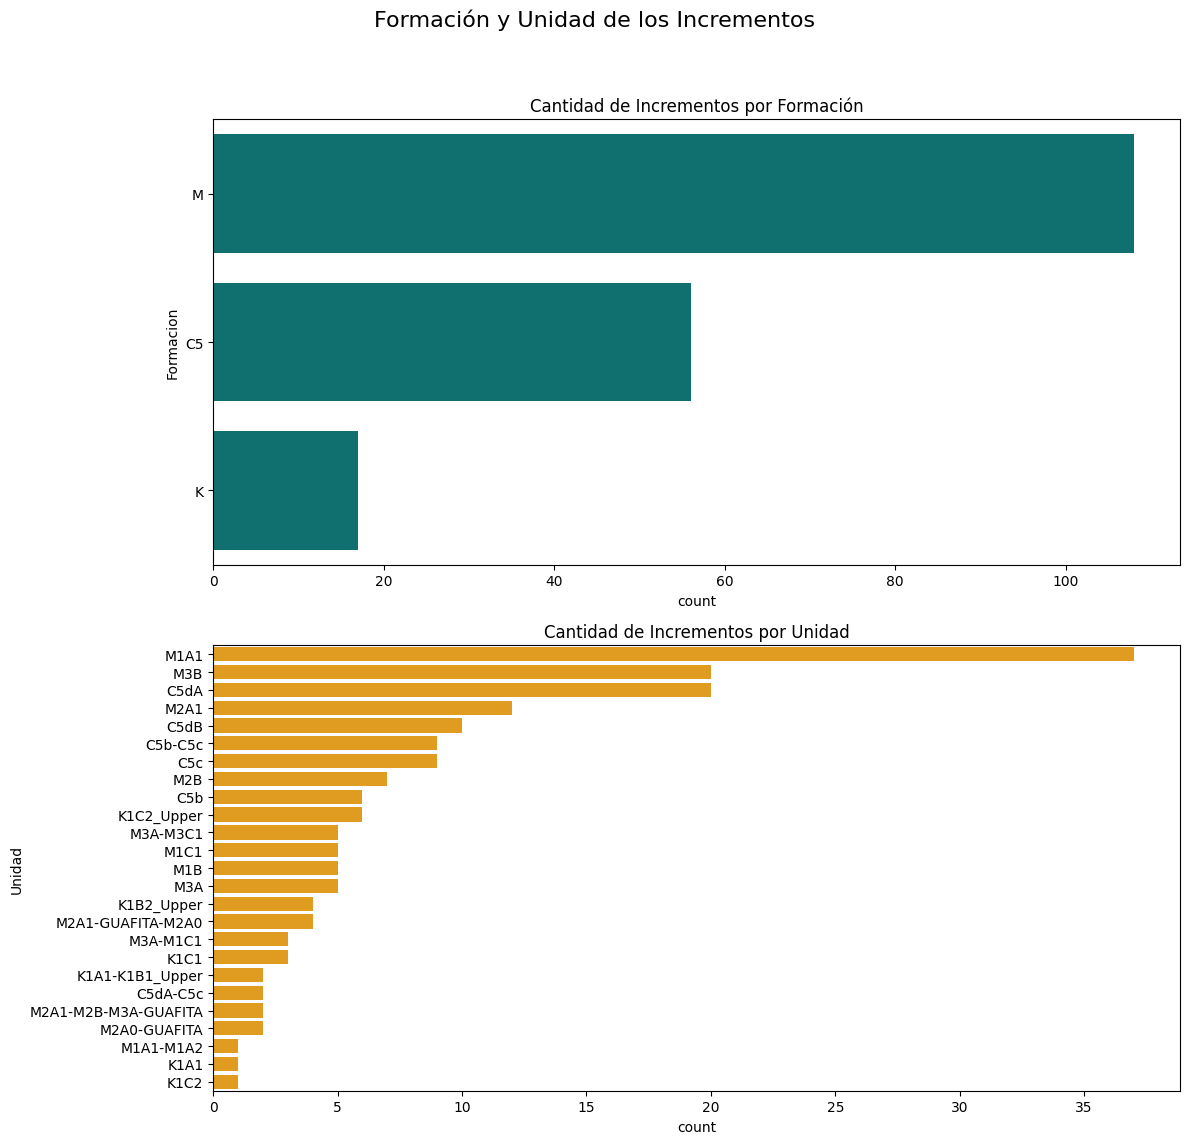

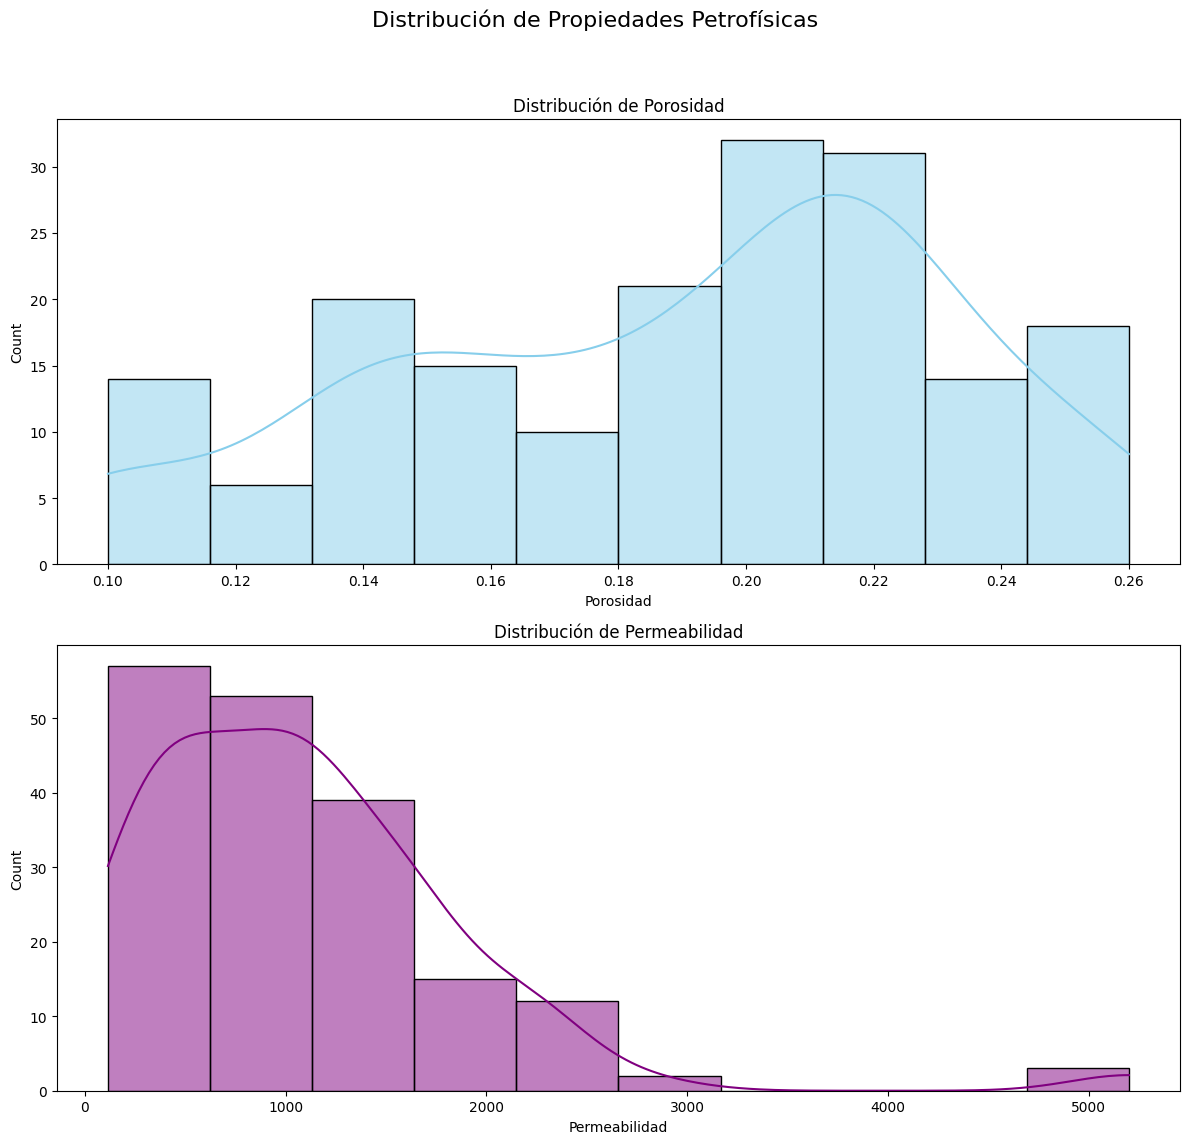

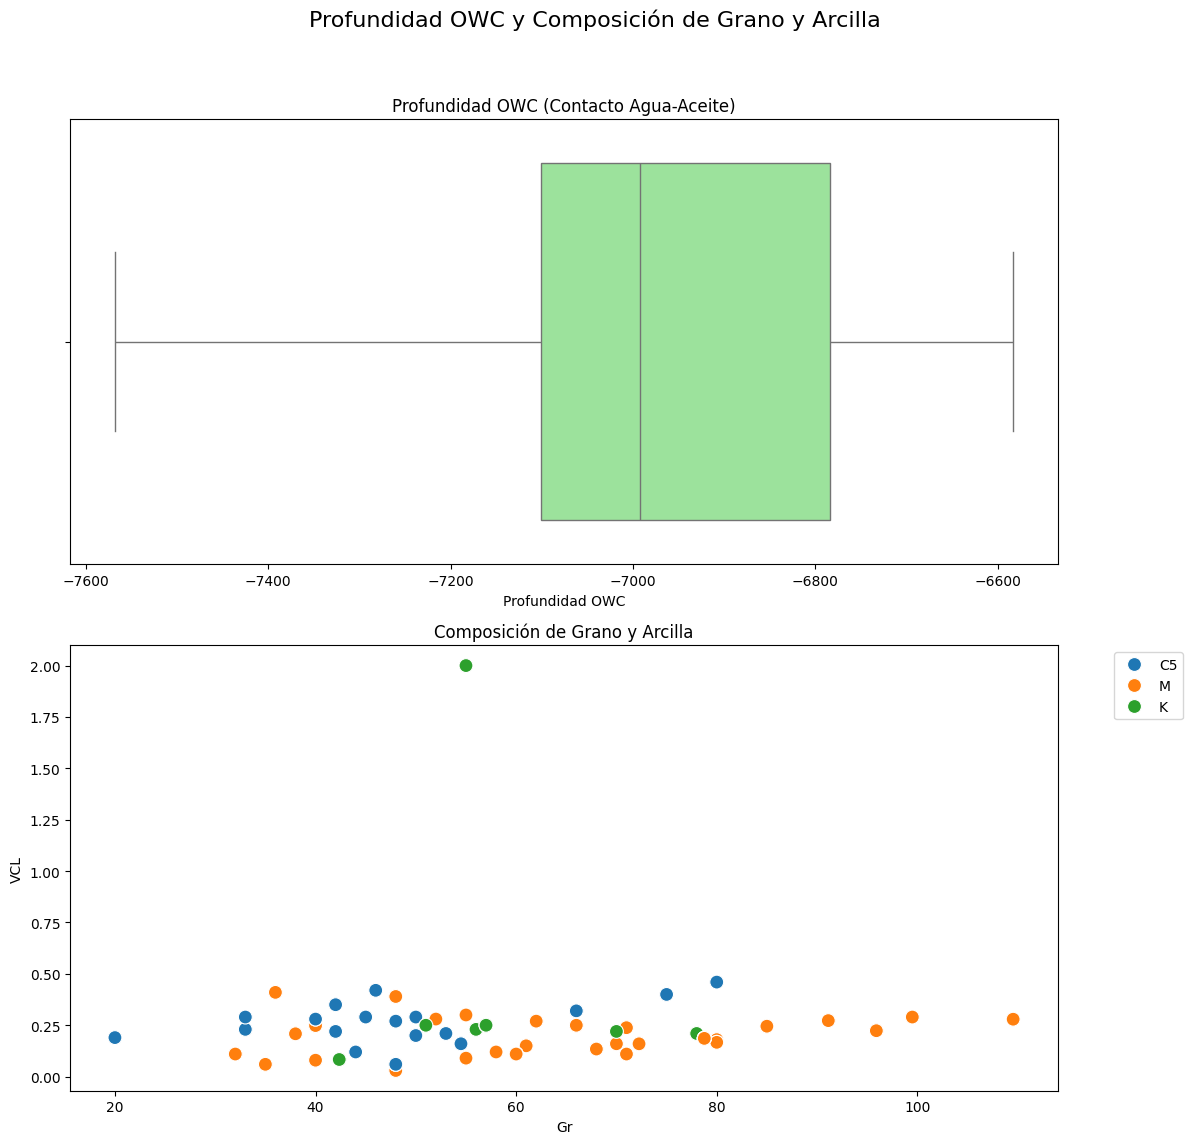

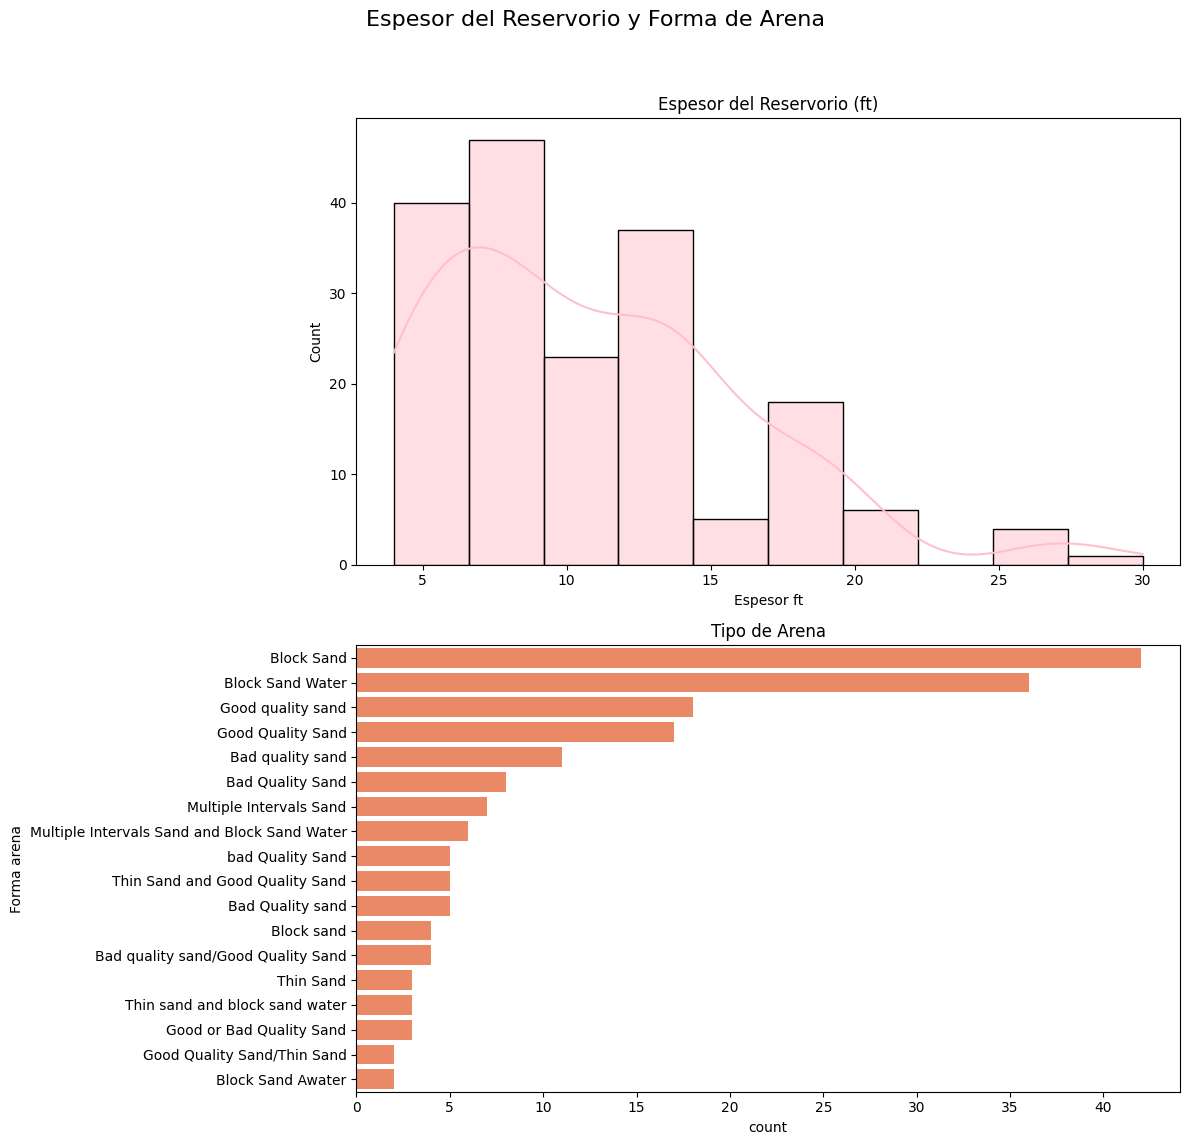

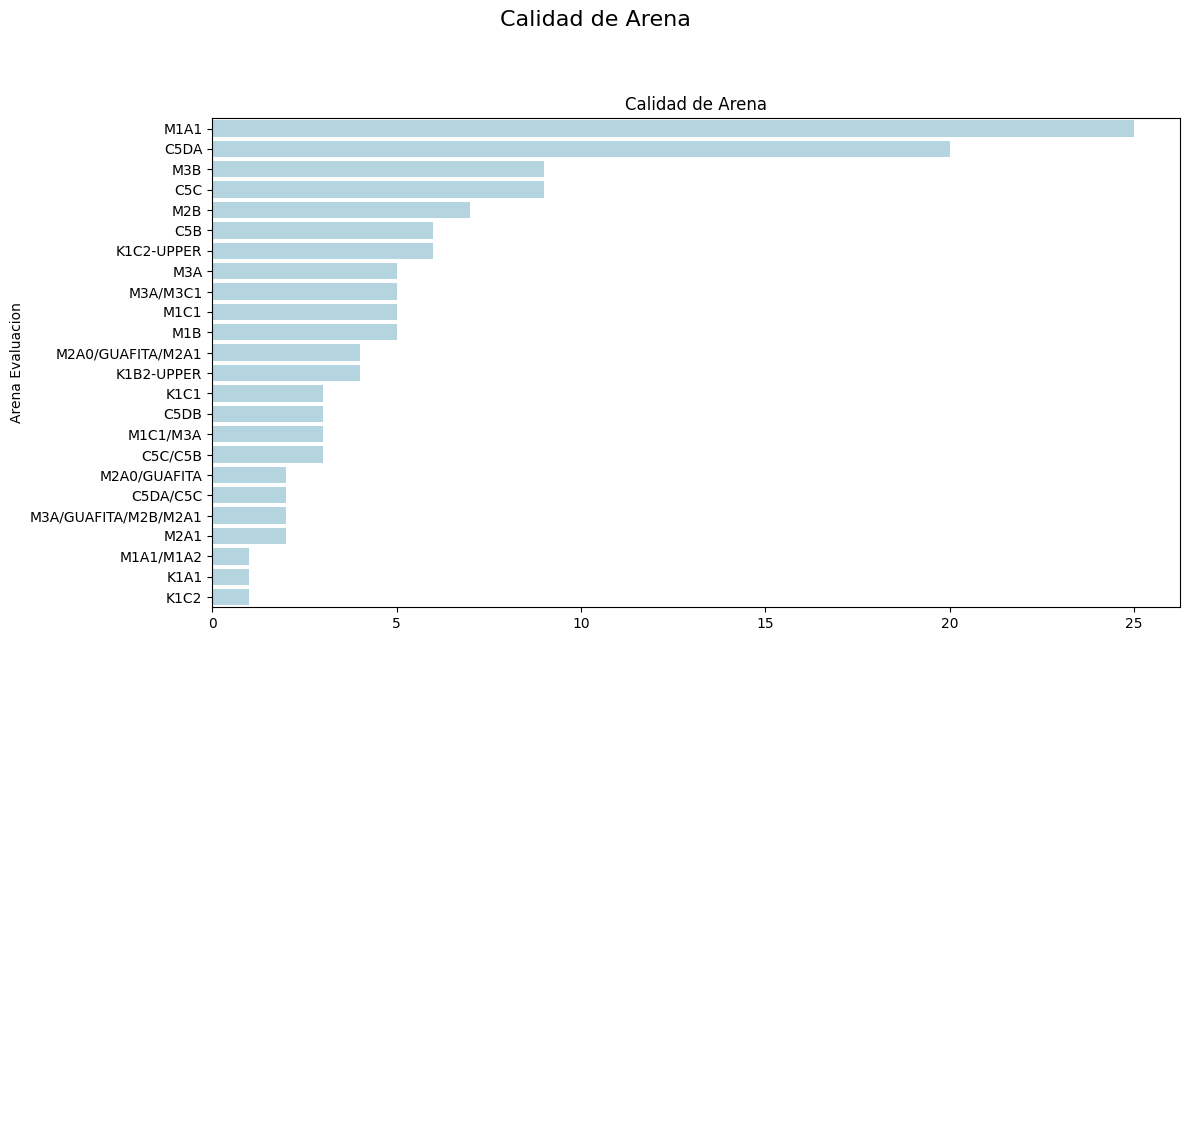

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de configuraciones de gráficos: (tipo, columnas, título, color/palette)
plots = [
    ('countplot', 'Formacion', 'Cantidad de Incrementos por Formación', 'teal'),
    ('countplot', 'Unidad', 'Cantidad de Incrementos por Unidad', 'orange'),
    ('histplot', 'Porosidad', 'Distribución de Porosidad', 'skyblue'),
    ('histplot', 'Permeabilidad', 'Distribución de Permeabilidad', 'purple'),
    ('boxplot', 'Profundidad OWC', 'Profundidad OWC (Contacto Agua-Aceite)', 'lightgreen'),
    ('scatter', ('Gr','VCL'), 'Composición de Grano y Arcilla', 'tab10'),
    ('histplot', 'Espesor ft', 'Espesor del Reservorio (ft)', 'pink'),
    ('countplot', 'Forma arena', 'Tipo de Arena', 'coral'),
    ('barplot', 'Arena Evaluacion', 'Calidad de Arena', 'lightblue')
]

# Títulos de las figuras según los gráficos que contienen
figure_titles = [
    'Formación y Unidad de los Incrementos',
    'Distribución de Propiedades Petrofísicas',
    'Profundidad OWC y Composición de Grano y Arcilla',
    'Espesor del Reservorio y Forma de Arena',
    'Calidad de Arena'
]

# Función para crear figuras con 2 gráficos en columna
def plot_two_by_two(plots_subset, df, fig_title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # 2 filas, 1 columna
    plt.suptitle(fig_title, fontsize=16)

    for i, (ptype, col, title, color) in enumerate(plots_subset):
        ax = axes[i]
        if ptype == 'countplot':
            sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=ax, color=color)
        elif ptype == 'histplot':
            sns.histplot(df[col], bins=10, kde=True, ax=ax, color=color)
        elif ptype == 'boxplot':
            sns.boxplot(x=col, data=df, ax=ax, color=color)
        elif ptype == 'scatter':
            sns.scatterplot(x=col[0], y=col[1], hue='Formacion', data=df, ax=ax, palette=color, s=100)
            ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')
        elif ptype == 'barplot':
            counts = df[col].value_counts()
            sns.barplot(x=counts.values, y=counts.index, ax=ax, color=color)
        ax.set_title(title)

    # Si solo hay un gráfico en la figura, se oculta el segundo eje
    if len(plots_subset) == 1:
        axes[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Crear las figuras
for i in range(0, len(plots), 2):
    subset = plots[i:i+2]
    fig_title = figure_titles[i//2]  # Título específico
    plot_two_by_two(subset, df, fig_title)


####2️⃣ Producción histórica / desempeño

* BOPD PRE / BOPD POST: producción de aceite antes y después del incremento.

* BWPD PRE / BWPD POST: producción de agua antes y después del incremento.

* BSW pre / post / NV: contenido de agua en el yacimiento; indicador de eficiencia y avance del acuífero.

* Rate antes / Rate después: tasas de producción normalizadas.

* Ocum / Water Cum / Ocum 500 / Water cum 500 / Ocum 1000 / Water cum 1000: producción acumulada de aceite y agua; permiten resumir el desempeño histórico por períodos.

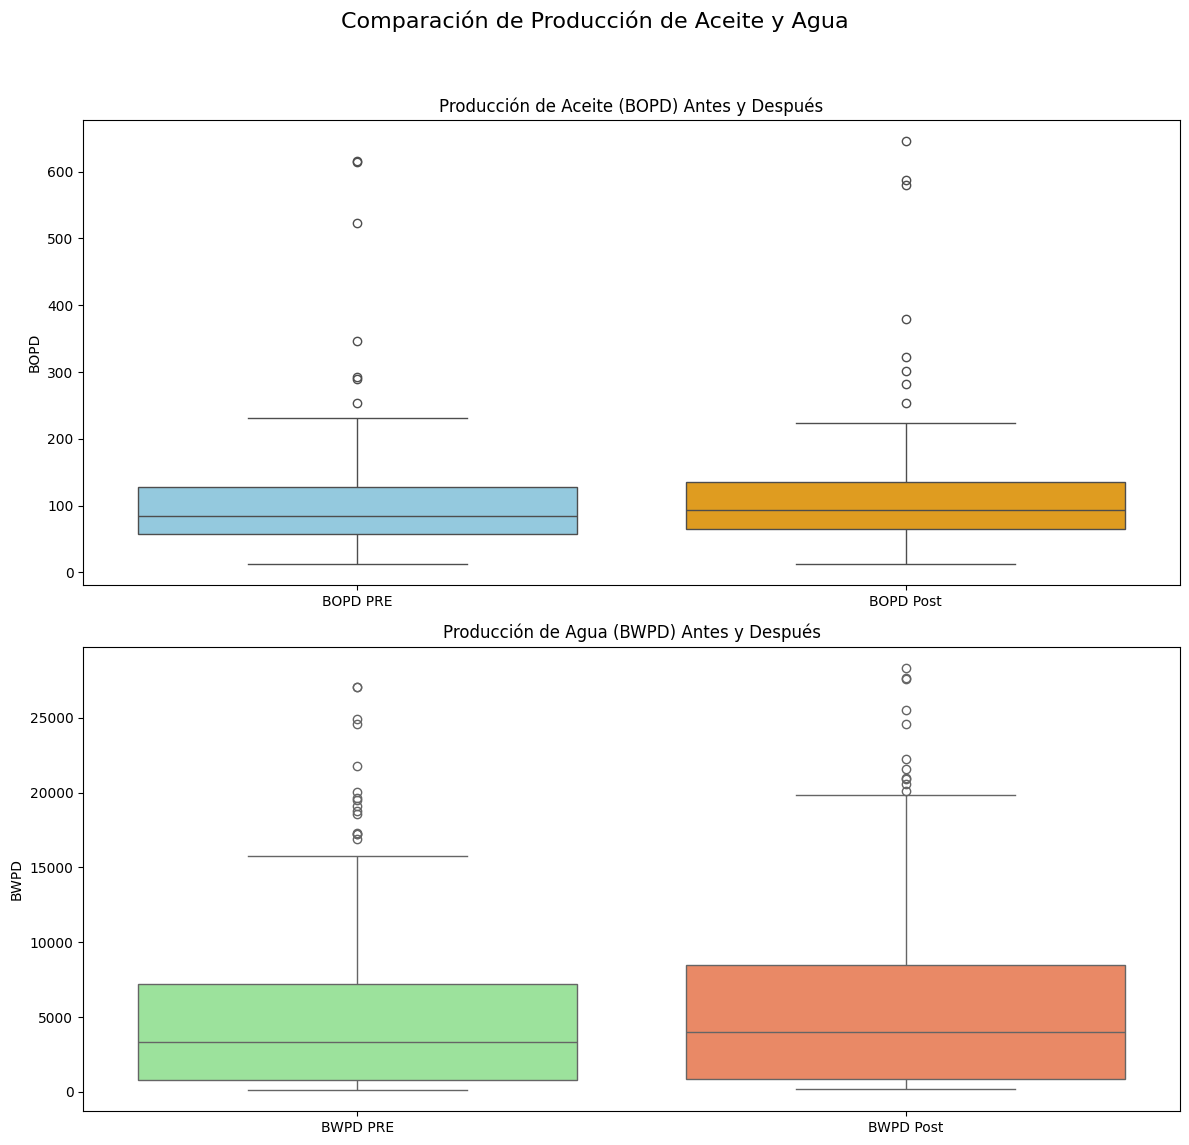

/tmp/ipython-input-2878025717.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Pre', 'Post', 'Pre NV'])


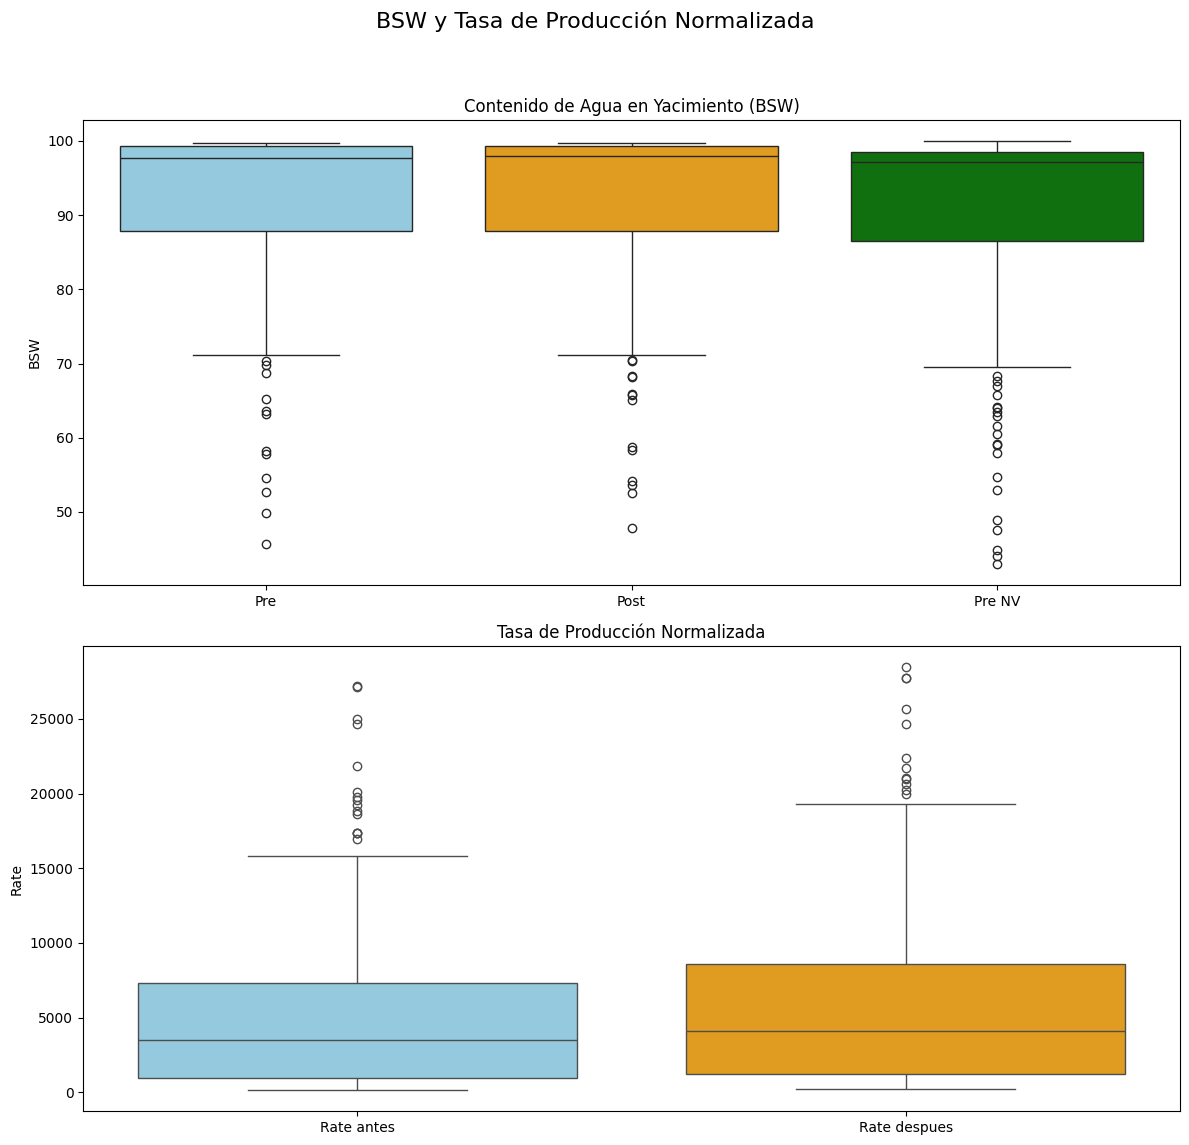

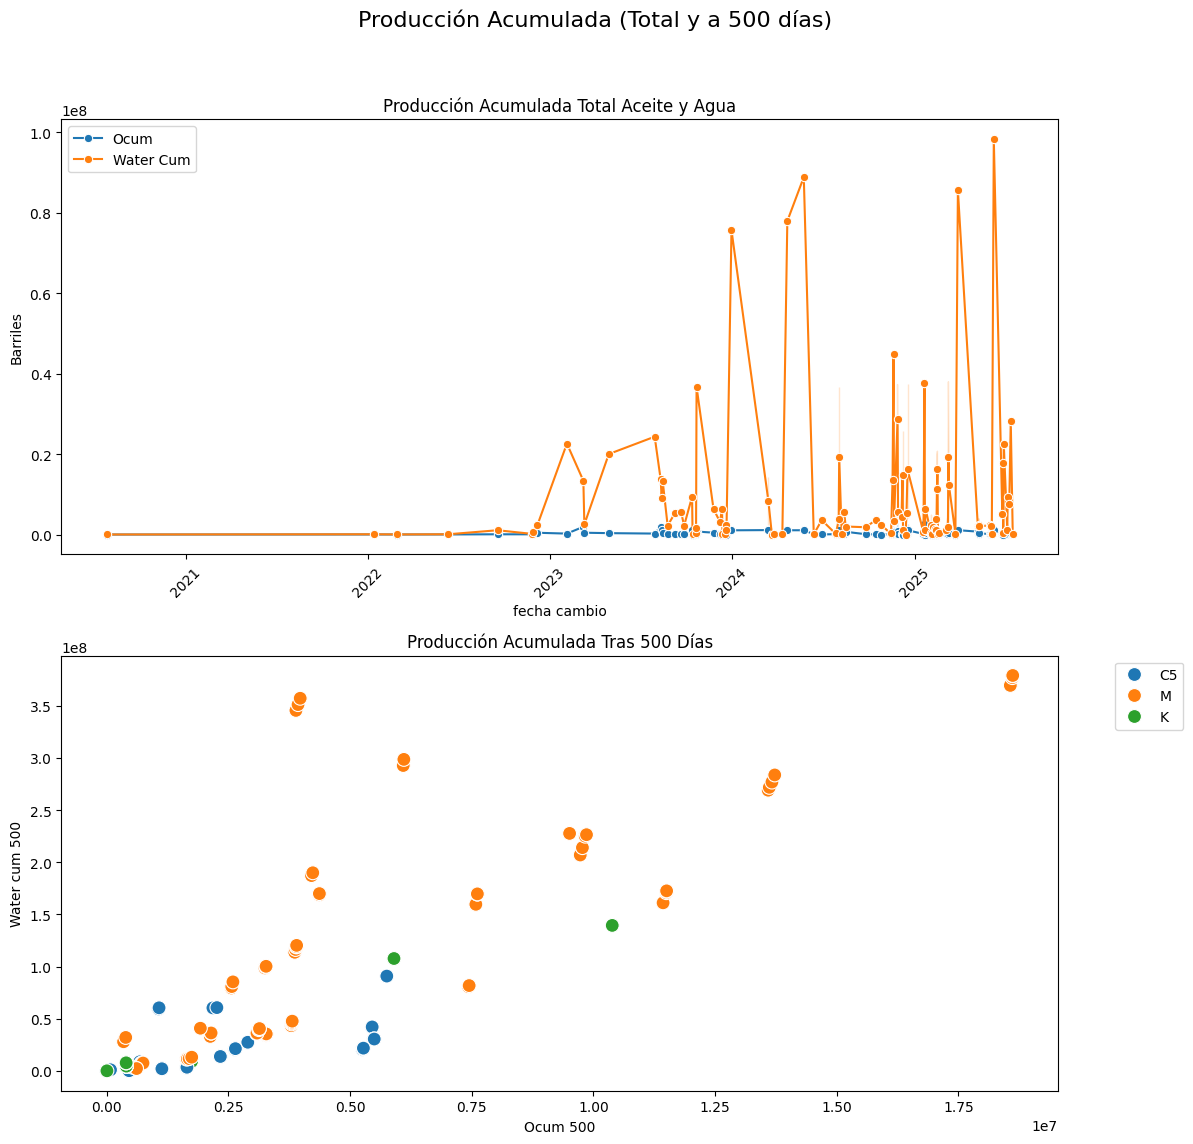

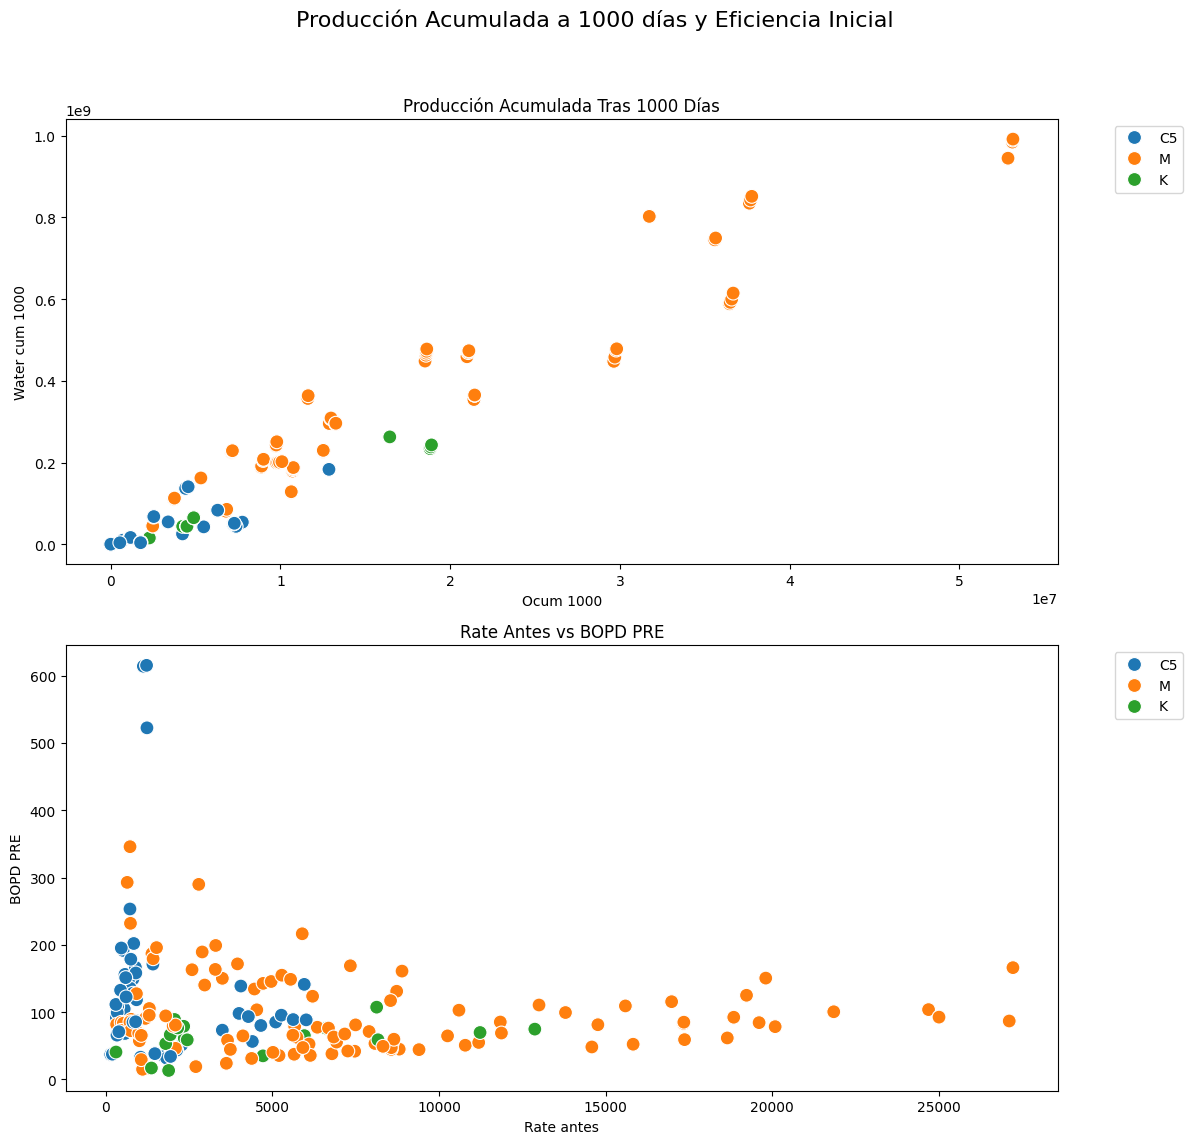

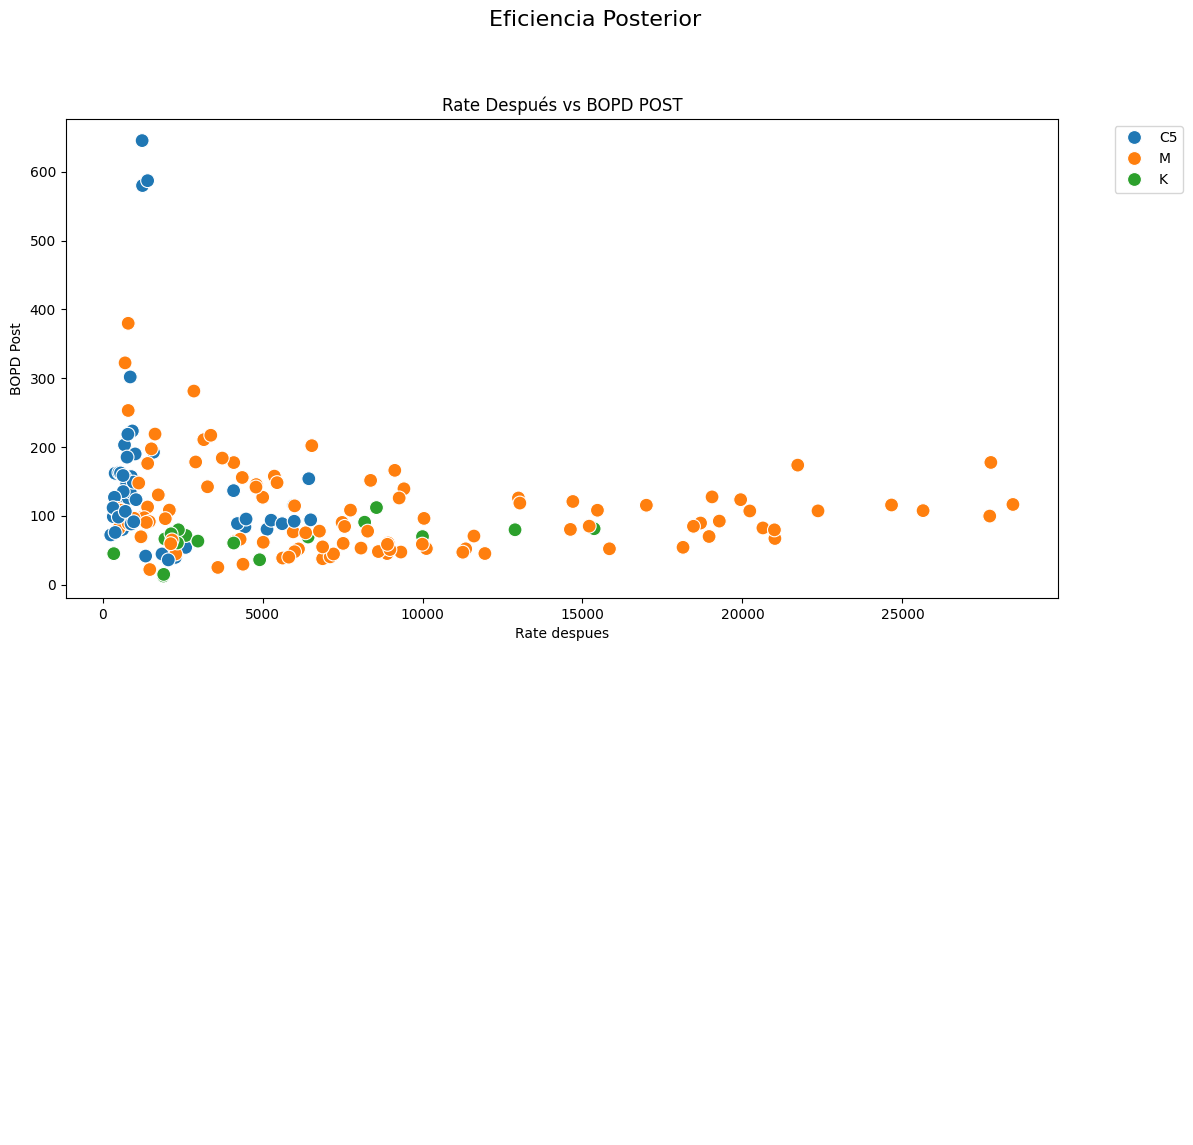

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de configuraciones de gráficos: (tipo, columnas, título, colores/palette)
plots = [
    ('boxplot_multi', ['BOPD PRE','BOPD Post'], 'Producción de Aceite (BOPD) Antes y Después', ['skyblue','orange']),
    ('boxplot_multi', ['BWPD PRE','BWPD Post'], 'Producción de Agua (BWPD) Antes y Después', ['lightgreen','coral']),
    ('boxplot_multi', ['BSW pre - validado','BSW Post validado','BSW Pre NV'], 'Contenido de Agua en Yacimiento (BSW)', ['skyblue','orange','green']),
    ('boxplot_multi', ['Rate antes','Rate despues'], 'Tasa de Producción Normalizada', ['skyblue','orange']),
    ('lineplot', ['fecha cambio','Ocum','Water Cum'], 'Producción Acumulada Total Aceite y Agua', None),
    ('scatter', ['Ocum 500','Water cum 500'], 'Producción Acumulada Tras 500 Días', 'tab10'),
    ('scatter', ['Ocum 1000','Water cum 1000'], 'Producción Acumulada Tras 1000 Días', 'tab10'),
    ('scatter', ['Rate antes','BOPD PRE'], 'Rate Antes vs BOPD PRE', 'tab10'),
    ('scatter', ['Rate despues','BOPD Post'], 'Rate Después vs BOPD POST', 'tab10')
]

# Títulos de figuras (según pares de gráficos)
figure_titles = [
    'Comparación de Producción de Aceite y Agua',
    'BSW y Tasa de Producción Normalizada',
    'Producción Acumulada (Total y a 500 días)',
    'Producción Acumulada a 1000 días y Eficiencia Inicial',
    'Eficiencia Posterior'
]

# Función para crear figuras con 2 gráficos en columna
def plot_two_by_two(plots_subset, df, fig_title):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    plt.suptitle(fig_title, fontsize=16)

    for i, (ptype, cols, title, color) in enumerate(plots_subset):
        ax = axes[i]
        if ptype == 'boxplot_multi':
            sns.boxplot(data=df[cols], ax=ax, palette=color)
            ax.set_title(title)
            ax.set_ylabel(cols[0].split()[0])
            if len(cols) == 3:  # caso especial para BSW
                ax.set_xticklabels(['Pre', 'Post', 'Pre NV'])
        elif ptype == 'lineplot':
            df_sorted = df.sort_values(cols[0])
            sns.lineplot(x=cols[0], y=cols[1], data=df_sorted, ax=ax, marker='o', label=cols[1])
            sns.lineplot(x=cols[0], y=cols[2], data=df_sorted, ax=ax, marker='o', label=cols[2])
            ax.set_title(title)
            ax.set_ylabel('Barriles')
            ax.legend()
            ax.tick_params(axis='x', rotation=45)
        elif ptype == 'scatter':
            sns.scatterplot(x=cols[0], y=cols[1], hue='Formacion', data=df, ax=ax, palette=color, s=100)
            ax.set_title(title)
            ax.set_xlabel(cols[0])
            ax.set_ylabel(cols[1])
            ax.legend(bbox_to_anchor=(1.05,1), loc='upper left')

    # Si solo hay un gráfico en la figura, se oculta el segundo eje
    if len(plots_subset) == 1:
        axes[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Crear las figuras (2 gráficos en columna por figura)
for i in range(0, len(plots), 2):
    subset = plots[i:i+2]
    fig_title = figure_titles[i//2]
    plot_two_by_two(subset, df, fig_title)


####Otras gráficas

In [ ]:
import pandas as pd

# Asegurarse que la columna fecha sea datetime
df['fecha cambio'] = pd.to_datetime(df['fecha cambio'], dayfirst=True, errors='coerce')

print("===== RESUMEN DEL DATASET =====\n")

# Rango de fechas
fecha_min = df['fecha cambio'].min()
fecha_max = df['fecha cambio'].max()
print(f"Rango de fechas: {fecha_min.date()} a {fecha_max.date()}")

# Cantidad de pozos únicos
cantidad_pozos = df['Pozo'].nunique()
print(f"Cantidad de pozos: {cantidad_pozos}")

# Rango de incrementos
incrementos_min = df['Incrementos'].min()
incrementos_max = df['Incrementos'].max()
print(f"Rango de incrementos: {incrementos_min} a {incrementos_max}")

# Estadísticas de propiedades de formación/reservorio
print("\n--- Propiedades del reservorio ---")
propiedades = ['Porosidad','Permeabilidad','Profundidad OWC','Gr','VCL','Espesor ft']
for col in propiedades:
    if col in df.columns:
        print(f"{col}: min={df[col].min():.3f}, max={df[col].max():.3f}, mean={df[col].mean():.3f}")

# Conteo de formaciones y unidades
print("\nConteo de formaciones y unidades:")
print(df.groupby('Formacion')['Unidad'].nunique())

# Estadísticas de producción BOPD y BWPD
print("\n--- Producción de aceite y agua ---")
produccion_cols = ['BOPD PRE','BOPD Post','BWPD PRE','BWPD Post']
for col in produccion_cols:
    if col in df.columns:
        print(f"{col}: min={df[col].min():.2f}, max={df[col].max():.2f}, mean={df[col].mean():.2f}")

# Razón aceite/agua pre y post
df['razon_pre'] = df['BOPD PRE'] / df['BWPD PRE']
df['razon_post'] = df['BOPD Post'] / df['BWPD Post']
print("\n--- Razón aceite/agua ---")
print(f"Pre incremento: min={df['razon_pre'].min():.2f}, max={df['razon_pre'].max():.2f}, mean={df['razon_pre'].mean():.2f}")
print(f"Post incremento: min={df['razon_post'].min():.2f}, max={df['razon_post'].max():.2f}, mean={df['razon_post'].mean():.2f}")

# Variable objetivo
target = 'Bueno 1/ Malo 0/ Regular 2'
if target in df.columns:
    print("\n--- Variable objetivo ---")
    print(df[target].value_counts())


===== RESUMEN DEL DATASET =====

Rango de fechas: 2019-04-18 a 2025-07-17
Cantidad de pozos: 54
Rango de incrementos: 1 a 11

--- Propiedades del reservorio ---
Porosidad: min=0.100, max=0.260, mean=0.188
Permeabilidad: min=115.000, max=5200.000, mean=1087.091
Profundidad OWC: min=-7568.000, max=-6583.000, mean=-6983.420
Gr: min=20.000, max=109.553, mean=57.950
VCL: min=0.030, max=2.000, mean=0.229
Espesor ft: min=4.000, max=30.000, mean=10.845

Conteo de formaciones y unidades:
Formacion
C5     6
K      6
M     13
Name: Unidad, dtype: int64

--- Producción de aceite y agua ---
BOPD PRE: min=13.22, max=615.33, mean=103.77
BOPD Post: min=12.75, max=645.19, mean=113.61
BWPD PRE: min=115.00, max=27052.00, mean=5295.32
BWPD Post: min=183.58, max=28338.33, mean=6047.90

--- Razón aceite/agua ---
Pre incremento: min=0.00, max=1.19, mean=0.11
Post incremento: min=0.00, max=1.09, mean=0.11

--- Variable objetivo ---
Bueno 1/ Malo 0/ Regular 2
1.0    131
0.0     28
2.0     20
Name: count, dtype

In [ ]:
# Cuántos pozos hay en el dataset
df['Pozo'].nunique()

54

### Modelado

#### 1.- Preparación de datos

In [ ]:
import pandas as pd

# --- 1️⃣ Eliminar registros con valores NaN ---
df_clean = df.dropna().reset_index(drop=True)

# --- 2️⃣ Feature Engineering ---

# Razones y diferencias de producción
df_clean['BOPD_ratio'] = df_clean['BOPD Post'] / df_clean['BOPD PRE']
df_clean['BWPD_ratio'] = df_clean['BWPD Post'] / df_clean['BWPD PRE']
df_clean['delta_BSW'] = df_clean['BSW Post validado'] - df_clean['BSW pre - validado']

# Combinaciones geológicas
df_clean['Porosidad_Permeabilidad'] = df_clean['Porosidad'] * df_clean['Permeabilidad']

# Producción acumulada / tasas
df_clean['Ocum_rate_1000'] = df_clean['Ocum 1000'] / 1000
df_clean['Water_rate_1000'] = df_clean['Water cum 1000'] / 1000

# Delta rate
df_clean['delta_rate'] = df_clean['Rate despues'] - df_clean['Rate antes']

# --- Nueva variable: Delta Drawdown ---
df_clean['drawdown_delta'] = df_clean['DD despues'] - df_clean['DD PRE']

# --- 3️⃣ Variables finales (DD originales eliminadas) ---
feature_cols = [
    'BOPD_ratio', 'BWPD_ratio', 'delta_BSW',
    'Porosidad_Permeabilidad',
    'Ocum_rate_1000', 'Water_rate_1000',
    'delta_rate', 'drawdown_delta'
]

categorical_cols = ['Formacion','Unidad','Forma arena']

# Target
target_col = 'Bueno 1/ Malo 0/ Regular 2'

# Dataset final listo para modelado
df_model = df_clean[feature_cols + categorical_cols + [target_col]]

print("Dataset limpio y con features seleccionadas (sin DD originales, usando drawdown_delta):")
print(f"Cantidad de registros: {len(df_model)}")
df_model.head()


Dataset limpio y con features seleccionadas (sin DD originales, usando drawdown_delta):
Cantidad de registros: 116


,BOPD_ratio,BWPD_ratio,delta_BSW,Porosidad_Permeabilidad,Ocum_rate_1000,Water_rate_1000,delta_rate,drawdown_delta,Formacion,Unidad,Forma arena,Bueno 1/ Malo 0/ Regular 2
0,1.150158,1.274343,0.20,317.800000,7725.346,53616.212,951,-0.003131,C5,C5dA,Thin sand and block sand water,1.0
1,1.432884,1.164664,-0.29,317.800000,7746.188,53942.870,740,0.004611,C5,C5dA,Thin sand and block sand water,1.0
2,1.354233,1.168626,-0.26,317.800000,7754.007,54070.360,876,0.001935,C5,C5dA,Thin sand and block sand water,1.0
3,1.042403,1.146951,0.03,124.662042,35590.132,745123.720,2320,0.001079,M,M2A1-M2B-M3A-GUAFITA,Multiple Intervals Sand,1.0
4,1.092814,1.127071,0.01,124.662042,35639.933,749623.184,2367,0.000916,M,M2A1-M2B-M3A-GUAFITA,Multiple Intervals Sand,1.0


In [ ]:
# Contar la cantidad de registros por cada valor
conteo = df['Bueno 1/ Malo 0/ Regular 2'].value_counts()

print(conteo)


Bueno 1/ Malo 0/ Regular 2
1.0    131
0.0     28
2.0     20
Name: count, dtype: int64


##### Generar datos sintéticos

In [ ]:
from imblearn.over_sampling import SMOTENC
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separar features y target
X = df_model.drop(columns=['Bueno 1/ Malo 0/ Regular 2'])
y = df_model['Bueno 1/ Malo 0/ Regular 2']

# Codificar categóricas
categorical_features = [X.columns.get_loc(col) for col in ['Formacion','Unidad','Forma arena']]
le_dict = {}
for col in ['Formacion','Unidad','Forma arena']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Definir SMOTENC con todas las clases deseadas
smote_nc = SMOTENC(categorical_features=categorical_features,
                   sampling_strategy={0:131, 1:131, 2:131},
                   random_state=42)

# Aplicar SMOTENC
X_res, y_res = smote_nc.fit_resample(X, y)

# Convertir a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='Bueno 1/ Malo 0/ Regular 2')], axis=1)

# Verificar conteos
print(df_resampled['Bueno 1/ Malo 0/ Regular 2'].value_counts())


Bueno 1/ Malo 0/ Regular 2
1.0    131
2.0    131
0.0    131
Name: count, dtype: int64


In [ ]:
df_model = df_resampled.copy()

#### 3.- Entrenamiento de DL

In [ ]:
%%capture
!pip install scikeras


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Convertir target a one-hot si es multiclase
y_encoded = LabelEncoder().fit_transform(y)
y_cat = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Función para evaluar modelo Keras ---
def evaluate_keras_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    y_test_labels = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    results = {
        'Accuracy': accuracy_score(y_test_labels, y_pred_labels),
        'Precision': precision_score(y_test_labels, y_pred_labels, average='macro', zero_division=0),
        'Recall': recall_score(y_test_labels, y_pred_labels, average='macro', zero_division=0),
        'F1': f1_score(y_test_labels, y_pred_labels, average='macro', zero_division=0),
        'Confusion Matrix': confusion_matrix(y_test_labels, y_pred_labels)
    }
    return results

# --- Modelos ---
input_shape = X_train.shape[1]  # número de features

# 1. MLP
mlp = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

# 2. LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm = Sequential([
    LSTM(64),
    Dense(y_cat.shape[1], activation='softmax')
])

# 3. GRU
gru = Sequential([
    GRU(64),
    Dense(y_cat.shape[1], activation='softmax')
])

# 4. 1D-CNN
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

# --- Evaluación ---
models = {'MLP': mlp, 'LSTM': lstm, 'GRU': gru, 'CNN': cnn}
results = {}

for name, model in models.items():
    if name in ['LSTM', 'GRU', 'CNN']:
        res = evaluate_keras_model(model, X_train_lstm, y_train, X_test_lstm, y_test, epochs=50)
    else:
        res = evaluate_keras_model(model, X_train, y_train, X_test, y_test, epochs=50)
    results[name] = res
    print(f"\nModelo: {name}")
    for k,v in res.items():
        if k != 'Confusion Matrix':
            print(f"{k}: {v:.4f}")
        else:
            print(f"{k}:\n{v}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Modelo: MLP
Accuracy: 0.9873
Precision: 0.9877
Recall: 0.9872
F1: 0.9872
Confusion Matrix:
[[27  0  0]
 [ 0 26  0]
 [ 0  1 25]]
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step

Modelo: LSTM
Accuracy: 0.8861
Precision: 0.8933
Recall: 0.8884
F1: 0.8823
Confusion Matrix:
[[19  3  5]
 [ 0 26  0]
 [ 1  0 25]]


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step

Modelo: GRU
Accuracy: 0.9241
Precision: 0.9257
Recall: 0.9250
F1: 0.9245
Confusion Matrix:
[[23  0  4]
 [ 0 26  0]
 [ 2  0 24]]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Modelo: CNN
Accuracy: 0.9873
Precision: 0.9877
Recall: 0.9872
F1: 0.9872
Confusion Matrix:
[[27  0  0]
 [ 0 26  0]
 [ 0  1 25]]


#####MLP

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

📊 Reporte de Evaluación (MLP):

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        27
         1.0       1.00      1.00      1.00        26
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79



/tmp/ipython-input-2694443993.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


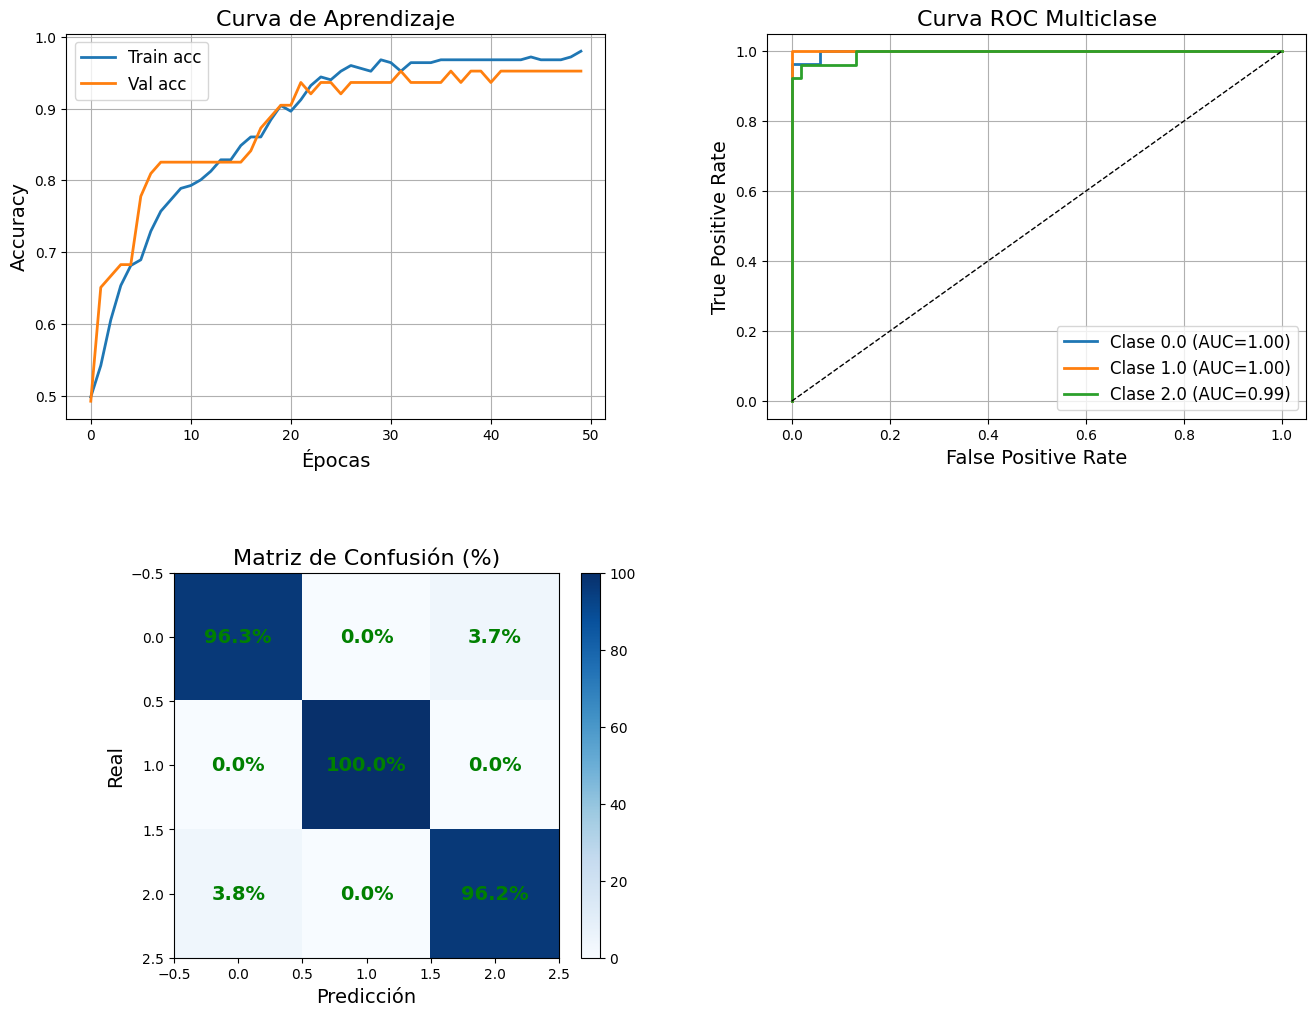

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from matplotlib.gridspec import GridSpec

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar variables categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar variables numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Modelo MLP ---
mlp = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Entrenamiento ---
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32,
                  validation_split=0.2, verbose=0)

# --- Predicciones ---
y_pred = mlp.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# --- Evaluación ---
print("\n📊 Reporte de Evaluación (MLP):\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=[str(c) for c in le.classes_]))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas en 2 filas x 2 columnas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje (fila 1, columna 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC (fila 1, columna 2)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión (fila 2, columna 1)
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_percent, cmap="Blues")
ax2.set_title("Matriz de Confusión (%)", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = f"{cm_percent[i, j]:.1f}%"
        ax2.text(j, i, text, ha="center", va="center", color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder vacío (fila 2, columna 2)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')  # Sin texto ni contenido

plt.tight_layout()
plt.show()


#####LSTM

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

📊 Reporte de Evaluación (LSTM):

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81        27
         1.0       0.90      1.00      0.95        26
         2.0       0.83      0.96      0.89        26

    accuracy                           0.89        79
   macro avg       0.89      0.89      0.88        79
weighted avg       0.89      0.89      0.88        79



/tmp/ipython-input-1579029057.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


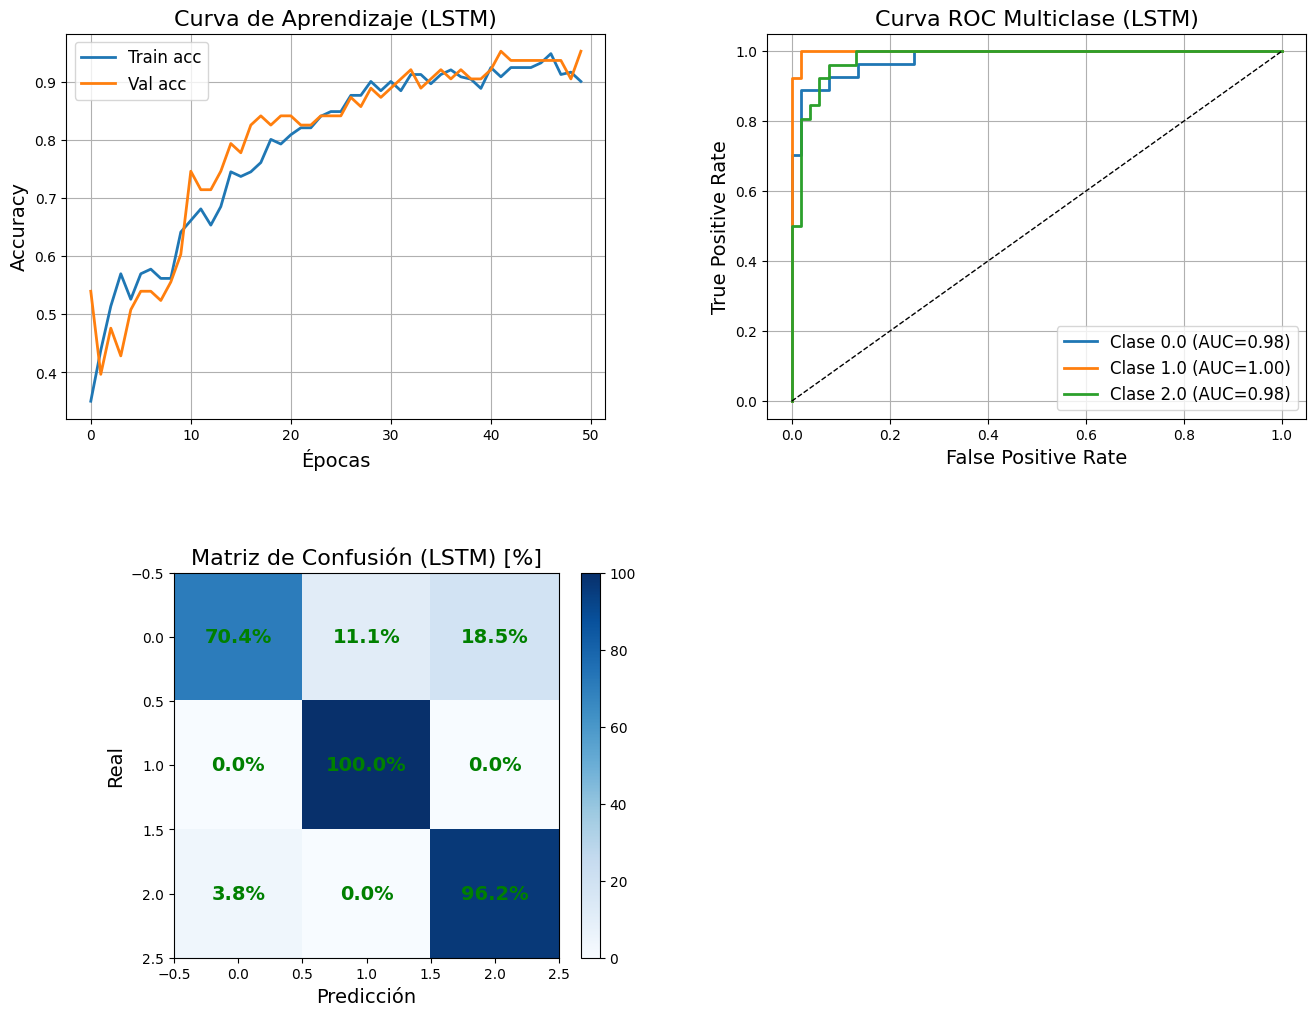

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib.gridspec import GridSpec

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar variables categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar variables numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# Reshape para LSTM (samples, timesteps, features=1)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# --- Modelo LSTM ---
lstm = Sequential([
    LSTM(64),
    Dense(y_cat.shape[1], activation='softmax')
])
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Entrenamiento ---
history_lstm = lstm.fit(
    X_train_lstm, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2, verbose=0
)

# --- Predicciones ---
y_pred_lstm = lstm.predict(X_test_lstm)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels_lstm = np.argmax(y_pred_lstm, axis=1)

# --- Evaluación ---
print("\n📊 Reporte de Evaluación (LSTM):\n")
print(classification_report(
    y_test_labels, y_pred_labels_lstm,
    target_names=[str(c) for c in le.classes_]
))

# --- Matriz de confusión ---
cm_lstm = confusion_matrix(y_test_labels, y_pred_labels_lstm)
cm_lstm_norm = cm_lstm.astype("float") / cm_lstm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_lstm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas en 2 filas x 2 columnas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje (fila 1, columna 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history_lstm.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history_lstm.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje (LSTM)", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC (fila 1, columna 2)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase (LSTM)", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión (fila 2, columna 1)
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_lstm_norm, cmap="Blues")
ax2.set_title("Matriz de Confusión (LSTM) [%]", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm_lstm.shape[0]):
    for j in range(cm_lstm.shape[1]):
        text = f"{cm_lstm_norm[i, j]:.1f}%"
        ax2.text(j, i, text, ha="center", va="center", color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder vacío (fila 2, columna 2)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')  # Sin texto ni contenido

plt.tight_layout()
plt.show()


#####GRU

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

📊 Reporte de Evaluación (GRU):

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        27
         1.0       0.96      0.96      0.96        26
         2.0       0.96      0.96      0.96        26

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



/tmp/ipython-input-4193017886.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


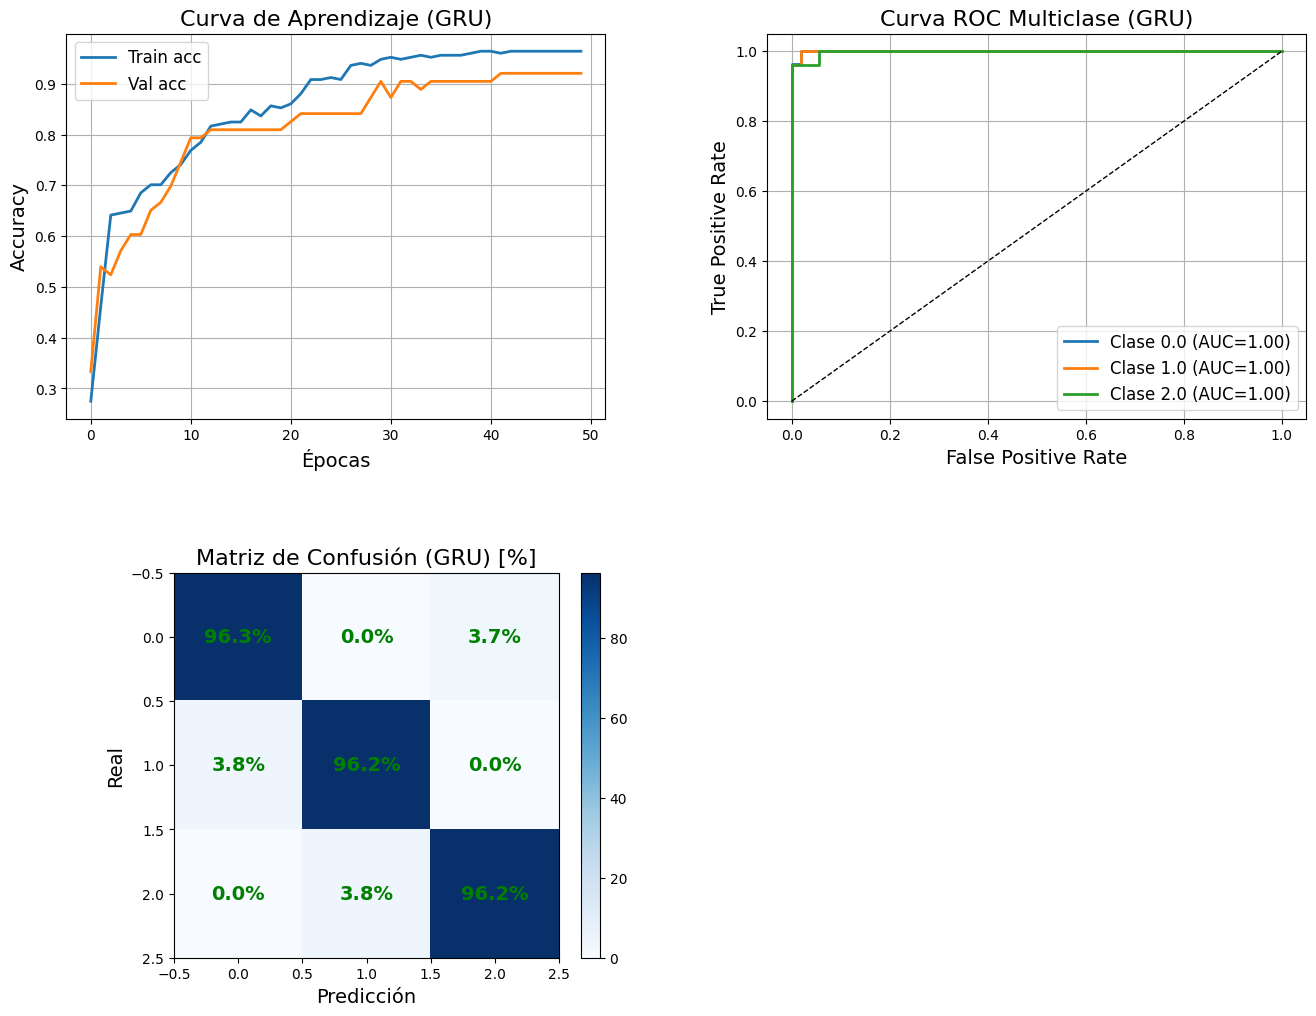

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
from matplotlib.gridspec import GridSpec

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Reshape para GRU (samples, timesteps=1, features)
X_seq = np.expand_dims(X.values, axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Modelo GRU ---
gru = Sequential([
    GRU(64),
    Dense(y_cat.shape[1], activation='softmax')
])
gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Entrenamiento ---
history_gru = gru.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2, verbose=0
)

# --- Predicciones ---
y_pred = gru.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# --- Evaluación ---
print("\n📊 Reporte de Evaluación (GRU):\n")
print(classification_report(
    y_test_labels, y_pred_labels,
    target_names=[str(c) for c in le.classes_]
))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas en 2 filas x 2 columnas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje (fila 1, columna 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history_gru.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history_gru.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje (GRU)", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC (fila 1, columna 2)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase (GRU)", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión (fila 2, columna 1)
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_norm, cmap="Blues")
ax2.set_title("Matriz de Confusión (GRU) [%]", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax2.text(j, i, f"{cm_norm[i, j]:.1f}%", ha="center", va="center",
                 color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder vacío (fila 2, columna 2)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')  # posición vacía para resumen/KPIs

plt.tight_layout()
plt.show()


#####CNN-1D

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

📊 Reporte de Evaluación (1D-CNN):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.96      1.00      0.98        26
         2.0       1.00      0.96      0.98        26

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



/tmp/ipython-input-1865733526.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


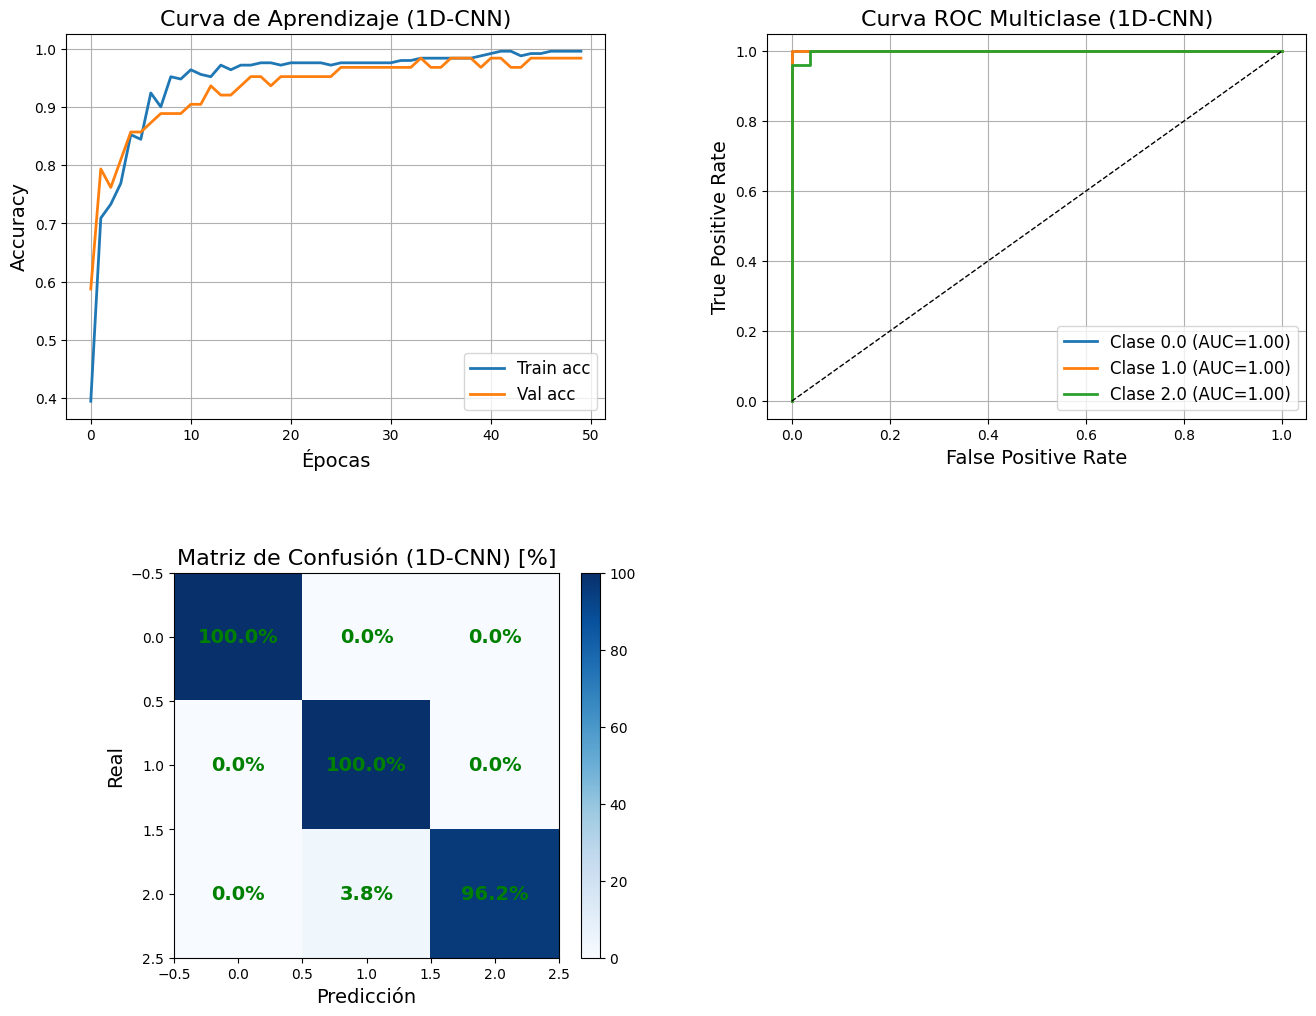

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib.gridspec import GridSpec

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Reshape para 1D-CNN -> (samples, timesteps=features, channels=1)
X_seq = np.expand_dims(X.values, axis=2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Modelo 1D-CNN ---
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --- Entrenamiento ---
history_cnn = cnn.fit(X_train, y_train, epochs=50, batch_size=32,
                      validation_split=0.2, verbose=0)

# --- Predicciones ---
y_pred = cnn.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# --- Evaluación ---
print("\n📊 Reporte de Evaluación (1D-CNN):\n")
print(classification_report(
    y_test_labels, y_pred_labels,
    target_names=[str(c) for c in le.classes_]
))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas en 2 filas x 2 columnas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje (fila 1, columna 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history_cnn.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history_cnn.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje (1D-CNN)", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC (fila 1, columna 2)
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase (1D-CNN)", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión (fila 2, columna 1)
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_norm, cmap="Blues")
ax2.set_title("Matriz de Confusión (1D-CNN) [%]", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax2.text(j, i, f"{cm_norm[i, j]:.1f}%", ha="center", va="center",
                 color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder vacío (fila 2, columna 2)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')  # posición vacía para resumen/KPIs

plt.tight_layout()
plt.show()


#### 4.- Optimización Bayesiana

In [ ]:
%%capture
!pip install bayesian-optimization

#####GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from bayes_opt import BayesianOptimization

# --- Preparar datos (usa tu df_model, feature_cols, categorical_cols, target_col) ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Reshape para GRU (samples, timesteps=1, features)
X_seq = np.expand_dims(X.values, axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Definir función objetivo para Bayesian Optimization ---
def train_evaluate(units, learning_rate, batch_size, epochs):
    units = int(units)
    batch_size = int(batch_size)
    epochs = int(epochs)

    model = Sequential([
        GRU(units),
        Dense(y_cat.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Evaluar en test
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    return acc  # métrica que la BO maximizará

# --- Definir espacio de búsqueda ---
pbounds = {
    'units': (16, 128),            # número de neuronas en GRU
    'learning_rate': (1e-4, 1e-2), # tasa de aprendizaje
    'batch_size': (16, 128),       # tamaño de batch
    'epochs': (10, 50)             # número de epochs
}

# --- Optimización Bayesiana ---
optimizer = BayesianOptimization(
    f=train_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=10)

print("\n✅ Mejor resultado encontrado:")
print(optimizer.max)


|   iter    |  target   |   units   | learni... | batch_... |  epochs   |
-------------------------------------------------------------------------
| 1         | 0.9620253 | 57.948493 | 0.0095120 | 97.983321 | 33.946339 |
| 2         | 0.9746835 | 33.474087 | 0.0016443 | 22.505364 | 44.647045 |
| 3         | 0.9746835 | 83.324881 | 0.0071099 | 18.305463 | 48.796394 |
| 4         | 0.9620253 | 109.23357 | 0.0022021 | 36.364396 | 17.336180 |
| 5         | 0.9620253 | 50.075131 | 0.0052950 | 64.377842 | 21.649165 |
| 6         | 0.9746835 | 57.774901 | 0.0091531 | 16.0      | 50.0      |
| 7         | 0.9620253 | 33.443872 | 0.0055502 | 21.670563 | 46.320389 |
| 8         | 0.9620253 | 67.467890 | 0.0021034 | 26.139618 | 22.601570 |
| 9         | 0.8481012 | 74.128697 | 0.0012981 | 24.780536 | 14.030493 |
| 10        | 0.6329113 | 33.669140 | 0.0001    | 25.954200 | 37.699035 |
| 11        | 0.7215189 | 53.503475 | 0.0001    | 16.455294 | 46.332042 |
| 12        | 0.9620253 | 79.283638 | 


🚀 Reentrenando modelo con mejores hiperparámetros...
{'units': np.float64(33.47408772955289), 'learning_rate': np.float64(0.0016443457513284064), 'batch_size': np.float64(22.505364562838338), 'epochs': np.float64(44.647045830997406)}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

📊 Reporte de Evaluación (Mejor GRU):

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        27
         1.0       1.00      0.96      0.98        26
         2.0       0.96      0.96      0.96        26

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



/tmp/ipython-input-1848092298.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


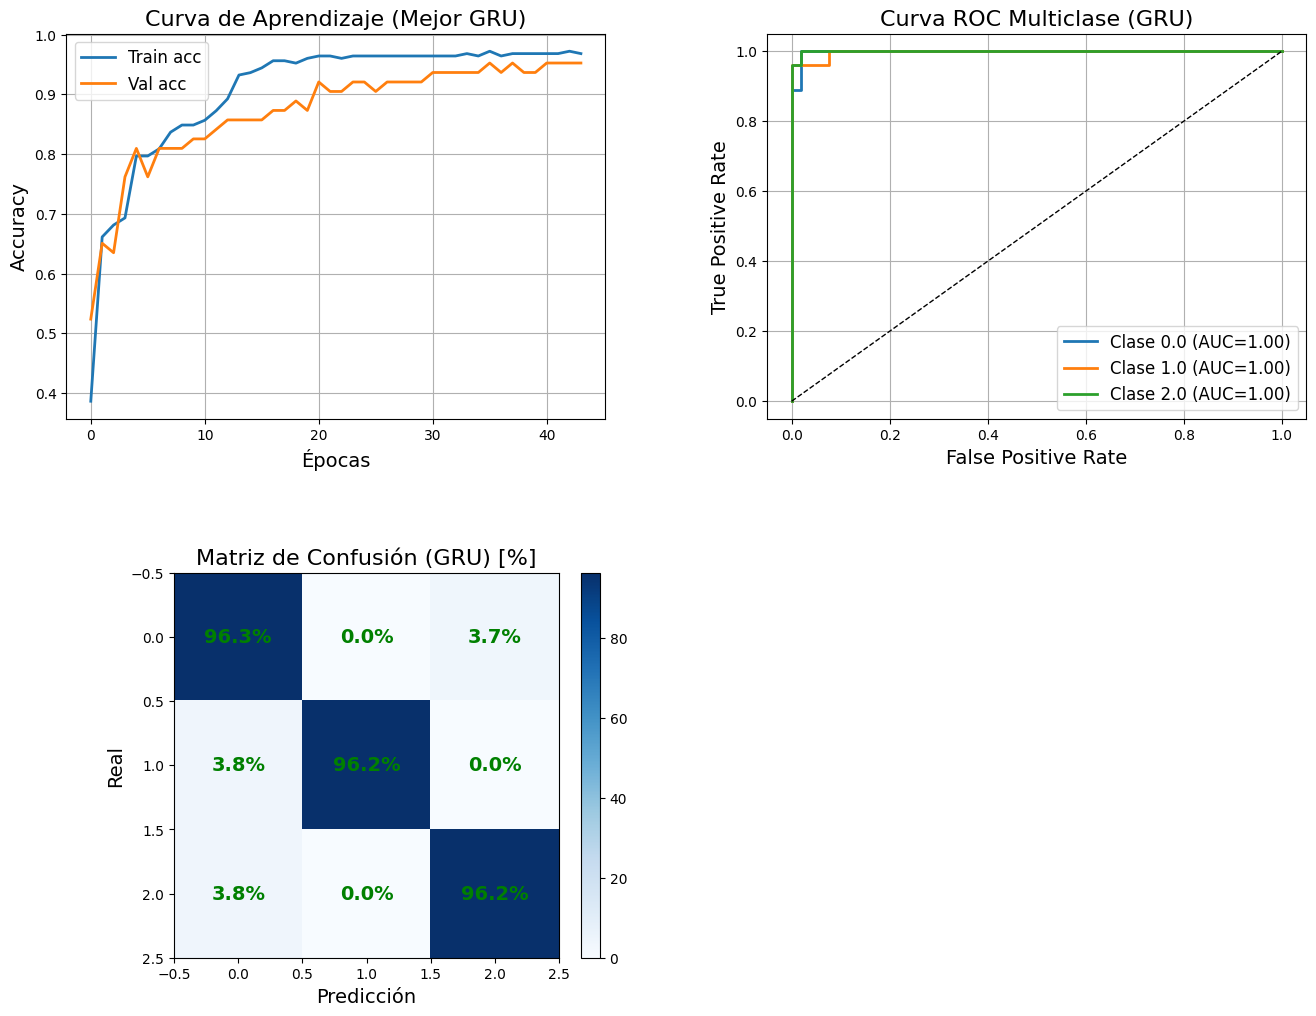

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from matplotlib.gridspec import GridSpec
import numpy as np


# --- Extraer mejores hiperparámetros ---
best_params = optimizer.max['params']
best_units = int(best_params['units'])
best_lr = best_params['learning_rate']
best_bs = int(best_params['batch_size'])
best_epochs = int(best_params['epochs'])

print("\n🚀 Reentrenando modelo con mejores hiperparámetros...")
print(best_params)

# --- Reentrenar el mejor modelo ---
best_model = Sequential([
    GRU(best_units),
    Dense(y_cat.shape[1], activation='softmax')
])
optimizer_best = Adam(learning_rate=best_lr)
best_model.compile(optimizer=optimizer_best, loss='categorical_crossentropy', metrics=['accuracy'])

history_best = best_model.fit(
    X_train, y_train,
    epochs=best_epochs,
    batch_size=best_bs,
    validation_split=0.2,
    verbose=0
)

# --- Evaluar ---
y_pred = best_model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print("\n📊 Reporte de Evaluación (Mejor GRU):\n")
print(classification_report(
    y_test_labels, y_pred_labels,
    target_names=[str(c) for c in le.classes_]
))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history_best.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history_best.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje (Mejor GRU)", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase (GRU)", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_norm, cmap="Blues")
ax2.set_title("Matriz de Confusión (GRU) [%]", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax2.text(j, i, f"{cm_norm[i, j]:.1f}%", ha="center", va="center",
                 color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder libre (puedes poner KPIs)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

plt.tight_layout()
plt.show()


#####CNN-1D

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from bayes_opt import BayesianOptimization

# --- Preparar datos ---
X = df_model[feature_cols + categorical_cols].copy()
y = df_model[target_col].copy()

# Codificar categóricas
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Escalar numéricas
scaler = StandardScaler()
X[feature_cols] = scaler.fit_transform(X[feature_cols])

# Codificar target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# Reshape para 1D-CNN -> (samples, timesteps=features, channels=1)
X_seq = np.expand_dims(X.values, axis=2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# --- Función objetivo para BO ---
def train_evaluate(filters, kernel_size, dense_units, learning_rate, batch_size, epochs):
    filters = int(filters)
    kernel_size = int(kernel_size)
    dense_units = int(dense_units)
    batch_size = int(batch_size)
    epochs = int(epochs)

    model = Sequential([
        Conv1D(filters, kernel_size=kernel_size, activation='relu'),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(y_cat.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    _, acc = model.evaluate(X_test, y_test, verbose=0)
    return acc

# --- Espacio de búsqueda ---
pbounds = {
    'filters': (16, 128),        # nº de filtros en Conv1D
    'kernel_size': (2, 6),       # tamaño de kernel
    'dense_units': (16, 128),    # nº neuronas en capa densa
    'learning_rate': (1e-4, 1e-2),
    'batch_size': (16, 128),
    'epochs': (10, 50)
}

# --- Optimización Bayesiana ---
optimizer = BayesianOptimization(
    f=train_evaluate,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=10)

print("\n✅ Mejor resultado encontrado:")
print(optimizer.max)


|   iter    |  target   |  filters  | kernel... | dense_... | learni... | batch_... |  epochs   |
-------------------------------------------------------------------------------------------------
| 1         | 0.9873417 | 57.948493 | 5.8028572 | 97.983321 | 0.0060267 | 33.474087 | 16.239780 |
| 2         | 0.9746835 | 22.505364 | 5.4647045 | 83.324881 | 0.0071099 | 18.305463 | 48.796394 |
| 3         | 0.9746835 | 109.23357 | 2.8493564 | 36.364396 | 0.0019157 | 50.075131 | 30.990257 |
| 4         | 0.9873417 | 64.377842 | 3.1649165 | 84.527524 | 0.0014809 | 48.720200 | 24.654473 |
| 5         | 0.9113923 | 67.079838 | 5.1407038 | 38.363463 | 0.0051909 | 82.350431 | 11.858016 |
| 6         | 0.9873417 | 81.185810 | 2.0       | 95.691383 | 0.01      | 24.481797 | 47.899394 |
| 7         | 0.9620253 | 80.259118 | 2.2389484 | 128.0     | 0.0006682 | 61.111521 | 35.993920 |
| 8         | 0.9873417 | 81.189978 | 2.9805799 | 97.125589 | 0.0070922 | 25.599105 | 46.707899 |
| 9         | 0.8101


🚀 Reentrenando modelo CNN con mejores hiperparámetros...
{'filters': np.float64(57.948493310904595), 'kernel_size': np.float64(5.802857225639665), 'dense_units': np.float64(97.98332148287737), 'learning_rate': np.float64(0.006026718993550663), 'batch_size': np.float64(33.47408772955289), 'epochs': np.float64(16.239780813448107)}
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

📊 Reporte de Evaluación (Mejor CNN):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.96      1.00      0.98        26
         2.0       1.00      0.96      0.98        26

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



/tmp/ipython-input-1075820955.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


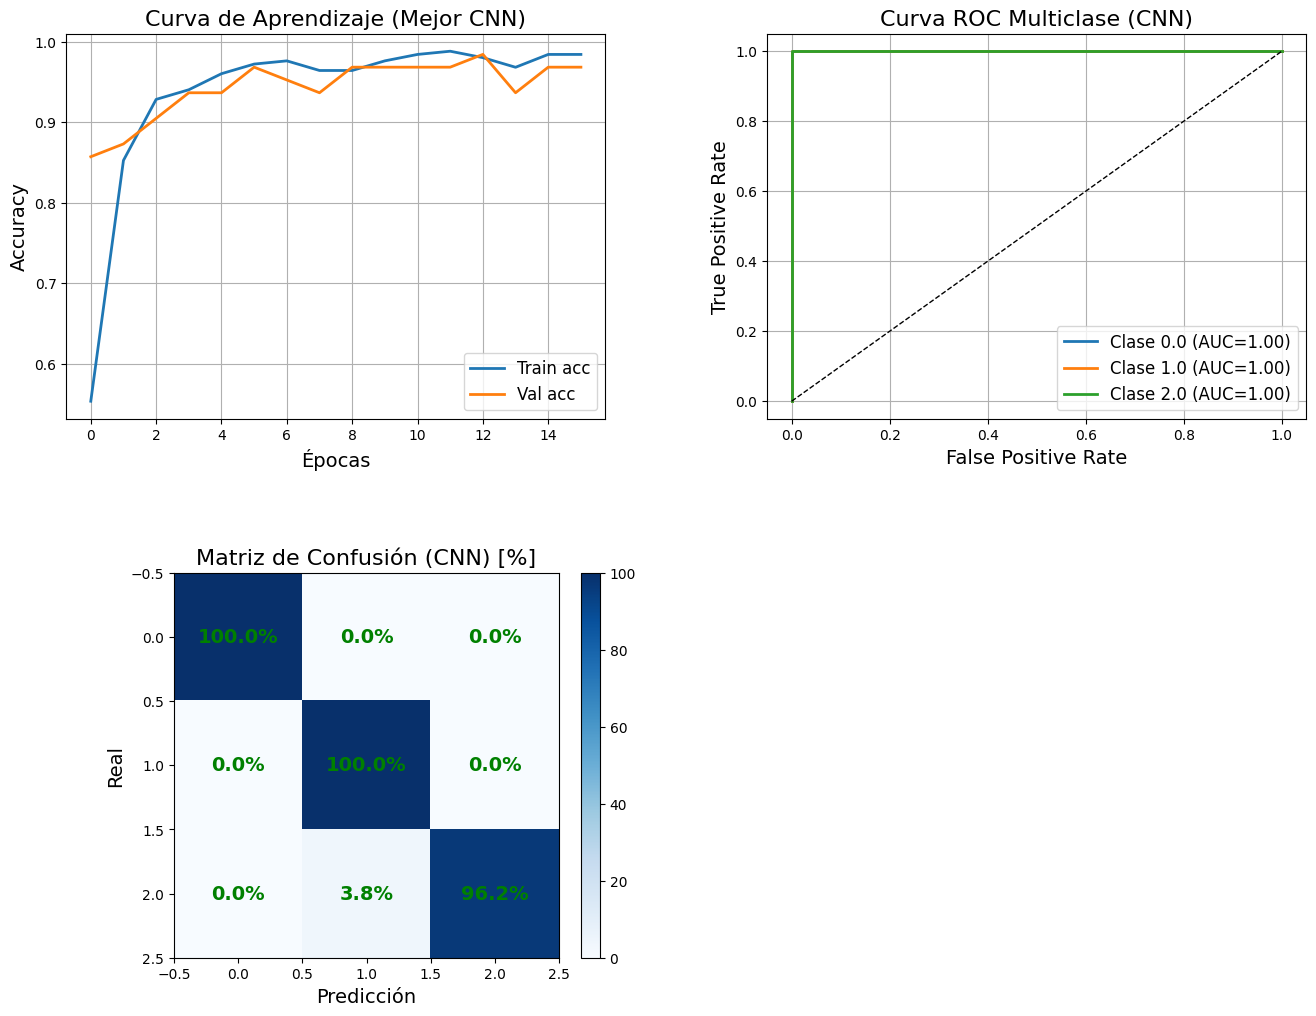

In [ ]:
# --- Extraer mejores hiperparámetros ---
best_params = optimizer.max['params']
best_filters = int(best_params['filters'])
best_kernel = int(best_params['kernel_size'])
best_dense = int(best_params['dense_units'])
best_lr = best_params['learning_rate']
best_bs = int(best_params['batch_size'])
best_epochs = int(best_params['epochs'])

print("\n🚀 Reentrenando modelo CNN con mejores hiperparámetros...")
print(best_params)

# --- Reentrenar el mejor modelo CNN ---
best_model = Sequential([
    Conv1D(best_filters, kernel_size=best_kernel, activation='relu'),
    Flatten(),
    Dense(best_dense, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])
optimizer_best = Adam(learning_rate=best_lr)
best_model.compile(optimizer=optimizer_best, loss='categorical_crossentropy', metrics=['accuracy'])

history_best = best_model.fit(
    X_train, y_train,
    epochs=best_epochs,
    batch_size=best_bs,
    validation_split=0.2,
    verbose=0
)

# --- Evaluar ---
y_pred = best_model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print("\n📊 Reporte de Evaluación (Mejor CNN):\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=[str(c) for c in le.classes_]))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test_labels, y_pred_labels)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100

# --- ROC multiclass ---
n_classes = y_cat.shape[1]
y_test_bin = label_binarize(y_test_labels, classes=range(n_classes))
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Gráficas ---
fig = plt.figure(figsize=(16,12))
gs = GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.4)

# 1. Curva de aprendizaje
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(history_best.history['accuracy'], label='Train acc', linewidth=2)
ax0.plot(history_best.history['val_accuracy'], label='Val acc', linewidth=2)
ax0.set_title("Curva de Aprendizaje (Mejor CNN)", fontsize=16)
ax0.set_xlabel("Épocas", fontsize=14)
ax0.set_ylabel("Accuracy", fontsize=14)
ax0.legend(fontsize=12)
ax0.grid(True)

# 2. Curva ROC
ax1 = fig.add_subplot(gs[0, 1])
for i in range(n_classes):
    ax1.plot(fpr[i], tpr[i], label=f'Clase {le.classes_[i]} (AUC={roc_auc[i]:.2f})', linewidth=2)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax1.set_title("Curva ROC Multiclase (CNN)", fontsize=16)
ax1.set_xlabel("False Positive Rate", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontsize=14)
ax1.legend(fontsize=12)
ax1.grid(True)

# 3. Matriz de confusión
ax2 = fig.add_subplot(gs[1, 0])
im = ax2.imshow(cm_norm, cmap="Blues")
ax2.set_title("Matriz de Confusión (CNN) [%]", fontsize=16)
ax2.set_xlabel("Predicción", fontsize=14)
ax2.set_ylabel("Real", fontsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax2.text(j, i, f"{cm_norm[i, j]:.1f}%", ha="center", va="center",
                 color="green", fontsize=14, fontweight="bold")
plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 4. Placeholder libre (puedes poner KPIs)
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

plt.tight_layout()
plt.show()


#### 5.- Validación Cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

y_labels = np.argmax(y_cat, axis=1)
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Guardar métricas de cada fold
fold_metrics = []

for fold, (train_index, val_index) in enumerate(kf.split(X_seq, y_labels), 1):
    X_train_fold, X_val_fold = X_seq[train_index], X_seq[val_index]
    y_train_fold, y_val_fold = y_cat[train_index], y_cat[val_index]

    # Crear modelo con los mejores hiperparámetros
    model = Sequential([
        Conv1D(best_filters, kernel_size=best_kernel, activation='relu'),
        Flatten(),
        Dense(best_dense, activation='relu'),
        Dense(y_cat.shape[1], activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=best_lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar
    model.fit(X_train_fold, y_train_fold,
              epochs=best_epochs,
              batch_size=best_bs,
              verbose=0)

    # Predecir
    y_pred = model.predict(X_val_fold)
    y_val_labels = np.argmax(y_val_fold, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Reporte de clasificación
    report = classification_report(
        y_val_labels, y_pred_labels, target_names=[str(c) for c in le.classes_], output_dict=True
    )
    fold_metrics.append(report)

    print(f"\n--- Fold {fold} ---")
    print(f"Accuracy: {report['accuracy']:.4f}")
    for cls in le.classes_:
        print(f"Clase {cls} -> Precision: {report[str(cls)]['precision']:.4f}, Recall: {report[str(cls)]['recall']:.4f}, F1: {report[str(cls)]['f1-score']:.4f}")

# Métricas promedio por clase
print("\n=== Métricas promedio por clase ===")
avg_metrics = {}
for cls in le.classes_:
    cls_str = str(cls)  # convertir float a string
    avg_precision = np.mean([fold[cls_str]['precision'] for fold in fold_metrics])
    avg_recall = np.mean([fold[cls_str]['recall'] for fold in fold_metrics])
    avg_f1 = np.mean([fold[cls_str]['f1-score'] for fold in fold_metrics])
    avg_metrics[cls_str] = {'precision': avg_precision, 'recall': avg_recall, 'f1-score': avg_f1}
    print(f"Clase {cls_str} -> Precision: {avg_precision:.4f}, Recall: {avg_recall:.4f}, F1: {avg_f1:.4f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

--- Fold 1 ---
Accuracy: 0.9620
Clase 0.0 -> Precision: 1.0000, Recall: 0.9615, F1: 0.9804
Clase 1.0 -> Precision: 0.9630, Recall: 0.9630, F1: 0.9630
Clase 2.0 -> Precision: 0.9259, Recall: 0.9615, F1: 0.9434
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

--- Fold 2 ---
Accuracy: 0.9873
Clase 0.0 -> Precision: 1.0000, Recall: 0.9615, F1: 0.9804
Clase 1.0 -> Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Clase 2.0 -> Precision: 0.9643, Recall: 1.0000, F1: 0.9818
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

--- Fold 3 ---
Accuracy: 0.9747
Clase 0.0 -> Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Clase 1.0 -> Precision: 0.9615, Recall: 0.9615, F1: 0.9615
Clase 2.0 -> Precision: 0.9615, Recall: 0.9615, F1: 0.9615
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

--- Fold 4 ---
Accuracy: 0.9744
Clase 0.0 -> Precision: 0.9630, Recall: 1.0000, F1: 0.9811
Clase 1.0 -> Precision: 0.9630, Recall: 1.0000, F1: 0.9811
Clase 2.0 -> Precision: 1.0000, Recall: 0.9231, F1: 0.9600
3/3 ━━━━